In [1]:
import numpy as np
import json
import sys
import pandas as pd
import os
import glob
import re
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

warnings.filterwarnings("ignore")

In [2]:
sys.path.insert(0, 'src')
from helper import *
from eda import *
from train import *
from etl import *

%load_ext autoreload

%autoreload 2

#### main

In [3]:
def main(targets):

    transform_config = json.load(open('config/transform.json'))
    eda_config = json.load(open('config/eda.json'))
    all_config = json.load(open("config/all.json"))

    test_unseen = 'unseen'
    test_seen = 'seen'
    
    cond1 = True
    cond2 = False

    if 'data' in targets:
        """generating feat from unseen and seen data"""
#         readfilerun('data/raw/train_r', 'data/temp/tempdata_r') # TODO uncomment
#         gen(test_seen, 'tempdata_r', **transform_config)
#         readfilerun('data/raw/train_c', 'data/temp/tempdata_c')
#         gen(test_unseen, 'tempdata_c', **transform_config)

    if 'eda' in targets:  
        # readfiledrun and gen for seen data, refer to data target
        print('plotting seen data')
        main_eda(test_seen, [200, 300], **eda_config)
        print('plotting un seen data')
        main_eda(test_unseen, [200, 300], **eda_config)
        print("EDA saved to outputs/eda/ folder")

    if 'train' in targets:
        "trains tests in this target"
        # readfiledrun and gen for seen data, refer to data target
                
        comb1 = getAllCombinations(1)
        comb2 = getAllCombinations(2)
        
        print("Testing on seen data: ")
        test_mse(test_seen, comb1, comb2)
        best_performance(test_seen)
        
    # MAKE FEATURE IMPORTANCE A TARGET??
                        
    if "inference" in targets: 
        # readfiledrun and gen for unseen data, refer to data target
        
        comb1 = getAllCombinations(1)
        comb2 = getAllCombinations(2)
        
        print("Testing on unseen data: ")
        test_mse(test_unseen, comb1, comb2)
        best_performance(test_unseen)
            
    if "test" in targets: 
        """ runs all targets on sample data"""
        print('tba')
        # readfilerun for seen an unseen data
       
        #  main_eda(test_seen, **eda_config)
#          print("EDA saved to outputs/eda/ folder")
        
#         comb1 = getAllCombinations(1)
#         comb2 = getAllCombinations(2)
        
#         print("Testing on seen data: ")
#         test_mse(test_seen, comb1, comb2)
#         best_performance(test_seen)
        
#         print("Testing on unseen data: ")
#         test_mse(test_unseen, comb1, comb2)
#         best_performance(test_unseen)
        
    if 'all' in targets: 
        # refer to test target
        print('tba')
        
# if __name__ == '__main__':

#     targets = sys.argv[1:]
#     main(targets)

In [4]:
targets = ['data', 'eda', 'train', 'inference', 'test', 'all']

git add . |
git commit -m "message" |
git pull origin main  (ctrl o or x?)|
git push |
user, token

In [33]:
label_col = 'loss'

dft = pd.read_csv(os.path.join(os.getcwd() , 'data','temp', "tempdata_c", 'labeled_200-1000-true-200-600.csv'))

df_colt = genfeat(dft)
f_dft = better_agg(df_colt)

indexcol = ['total_bytes','max_bytes','2->1Bytes','2->1Pkts','total_pkts', 'total_pkts_min', 'total_pkts_max', 'number_ms', 'pkt_ratio','time_spread', 'time_spread_min','time_spread_max','pkt sum','longest_seq', 'longest_seq_min', 'longest_seq_max','total_pkt_sizes','byte_ratio', 'mean_tdelta', 'max_tdelta']
#indexcol = f_dft.columns

len(indexcol)

X_train, X_test, y_train, y_test = train_test_split(
    f_dft[[x for x in indexcol if x in f_dft.columns]], f_dft[label_col])
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
etree = ExtraTreesRegressor(n_estimators=400, n_jobs=4)
etreeft = etree.fit(X_train,y_train)

y_pred3 = etree.predict(X_test)
acc3= mean_squared_error(y_test, y_pred3)


print(f'mse: {acc3}, r2: {etree.score(X_test, y_test)}')
# feat_imp = pd.Series(index=[x for x in indexcol if x in f_dft.columns], 
#           data=etree.feature_importances_).sort_values(ascending=False)
feat_imp

mse: 0.0, r2: 1.0


2->1Bytes          0.153140
2->1Pkts           0.144066
max_tdelta         0.096657
total_pkts         0.096475
number_ms          0.092771
total_bytes        0.078545
pkt sum            0.071445
total_pkt_sizes    0.070366
mean_tdelta        0.045447
time_spread        0.041740
max_bytes          0.028986
byte_ratio         0.027308
pkt_ratio          0.027258
longest_seq        0.025796
dtype: float64

In [34]:
roll_df = pd.DataFrame(y_pred3).rename(columns = {0:'preds'})#.rolling(2).mean() # roling over past 20 seconds

In [38]:
roll_df['rollingmean'] = roll_df['preds'].rolling(2).mean()

In [41]:
roll_df['rollingmean'].unique()

array([  nan, 1000.])

<AxesSubplot:>

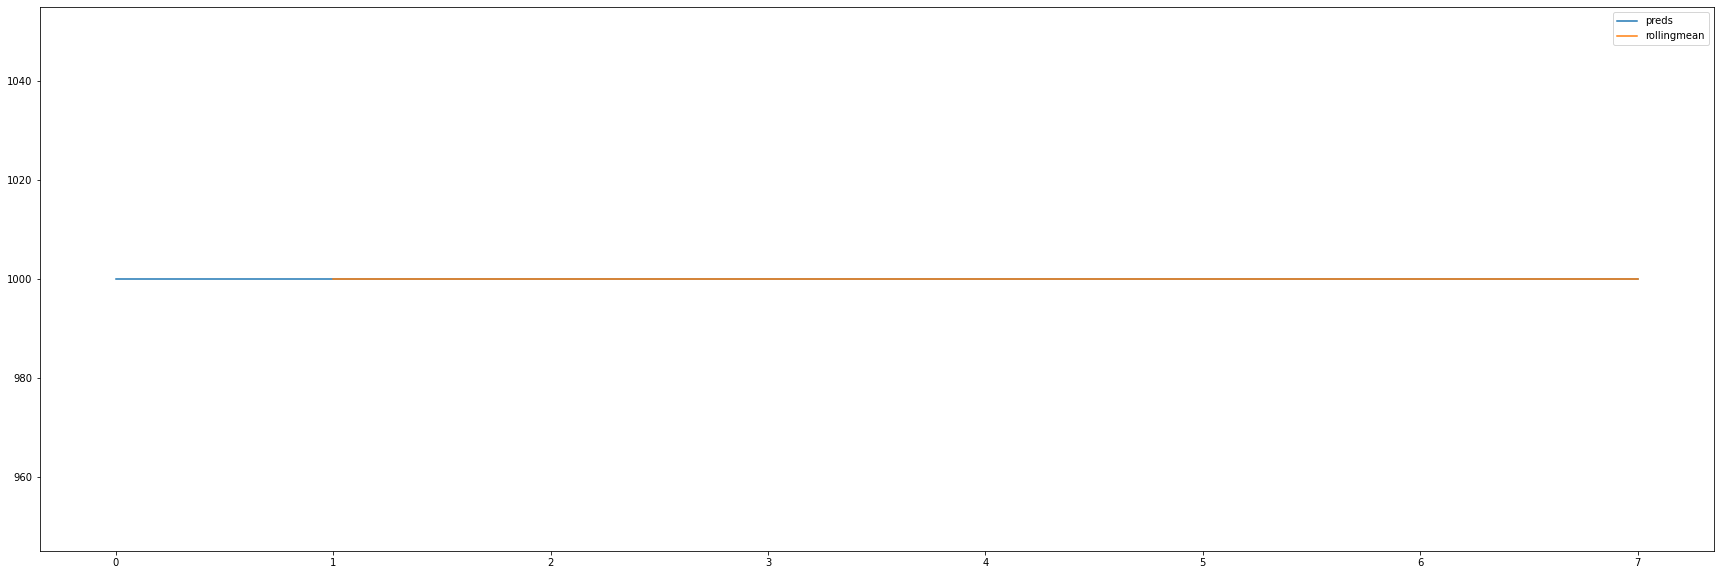

In [40]:
roll_df.plot(figsize=(30, 10))